In [2]:
%load_ext autoreload
%autoreload 2

In [14]:
from src.utils import read_csv
from src.preprocessor_utils import convert_to_lowercase
from src.data_preprocessor import DataPreprocessor
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
# sns.set_palette('Set2')
palette = sns.husl_palette(10)

In [202]:
trainX, trainY = read_csv('data/train.csv', ylabel='price')

In [203]:
trainX, trainY = DataPreprocessor().drop_outliers(trainX, trainY)
trainX = convert_to_lowercase(trainX)

In [204]:
# % of the number of data samples which have NA to the total number of data samples in training set
all_data_na = (trainX.isnull().sum() / len(trainX)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing %': all_data_na})

for each_na_feature in np.transpose(missing_data).columns:
    print('{}, dtype = {}'.format(each_na_feature, trainX[str(each_na_feature)].dtype))

missing_data.head(15)

floor_level, dtype = object
total_num_units, dtype = float64
tenure, dtype = object
available_unit_types, dtype = object
built_year, dtype = float64
num_baths, dtype = float64
subzone, dtype = object
planning_area, dtype = object
num_beds, dtype = float64


,Missing %
floor_level,82.601780
total_num_units,27.996222
tenure,8.554954
available_unit_types,7.153154
built_year,4.583188
num_baths,2.147437
subzone,0.561714
planning_area,0.561714
num_beds,0.397674


Text(0.5, 1.0, '% missing data by feature')

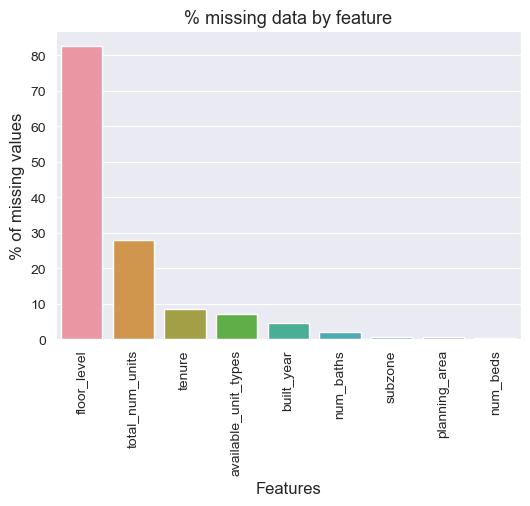

In [205]:
plt.figure(figsize=(6, 4))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=12)
plt.ylabel('% of missing values', fontsize=12)
plt.title('% missing data by feature', fontsize=13)

In [114]:
trainX.head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,floor_level,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,NaN,unspecified,NaN,116.0,https://www.99.co/singapore/hdb/866-yishun-str...,1.414399,103.837196,0,yishun south,yishun
1,259374,hdb flat for sale in 506b serangoon north aven...,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,NaN,unspecified,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-e...,1.372597,103.875625,0,serangoon north,serangoon
2,665422,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,low,partial,"studio, 3, 4, 5, 6 br",56.0,https://www.99.co/singapore/condos-apartments/...,1.298773,103.895798,0,mountbatten,marine parade
3,857699,3 bed condo for sale in leedon green,26 leedon heights,leedon green,condo,freehold,2023.0,3.0,2.0,958,NaN,partial,"studio, 1, 2, 3, 4 br",638.0,https://www.99.co/singapore/condos-apartments/...,1.312364,103.803271,0,farrer court,bukit timah
4,216061,2 bed condo for sale in one bernam,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,NaN,unspecified,"studio, 1, 2, 3, 4, 5 br",351.0,https://www.99.co/singapore/condos-apartments/...,1.273959,103.843635,0,anson,downtown core


In [206]:
df_trainY = pd.DataFrame(data=trainY, columns=['price'])
column_names = list(trainX.columns.values)
column_names.append('price')
train_X_Y = pd.concat([trainX, df_trainY],axis=1, ignore_index=True, sort=False)
train_X_Y.columns = column_names

In [116]:
train_X_Y.head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,...,unspecified,NaN,116.0,https://www.99.co/singapore/hdb/866-yishun-str...,1.414399,103.837196,0,yishun south,yishun,514500.0
1,259374,hdb flat for sale in 506b serangoon north aven...,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,...,unspecified,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-e...,1.372597,103.875625,0,serangoon north,serangoon,995400.0
2,665422,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,...,partial,"studio, 3, 4, 5, 6 br",56.0,https://www.99.co/singapore/condos-apartments/...,1.298773,103.895798,0,mountbatten,marine parade,8485000.0
3,857699,3 bed condo for sale in leedon green,26 leedon heights,leedon green,condo,freehold,2023.0,3.0,2.0,958,...,partial,"studio, 1, 2, 3, 4 br",638.0,https://www.99.co/singapore/condos-apartments/...,1.312364,103.803271,0,farrer court,bukit timah,2626000.0
4,216061,2 bed condo for sale in one bernam,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,...,unspecified,"studio, 1, 2, 3, 4, 5 br",351.0,https://www.99.co/singapore/condos-apartments/...,1.273959,103.843635,0,anson,downtown core,1764000.0


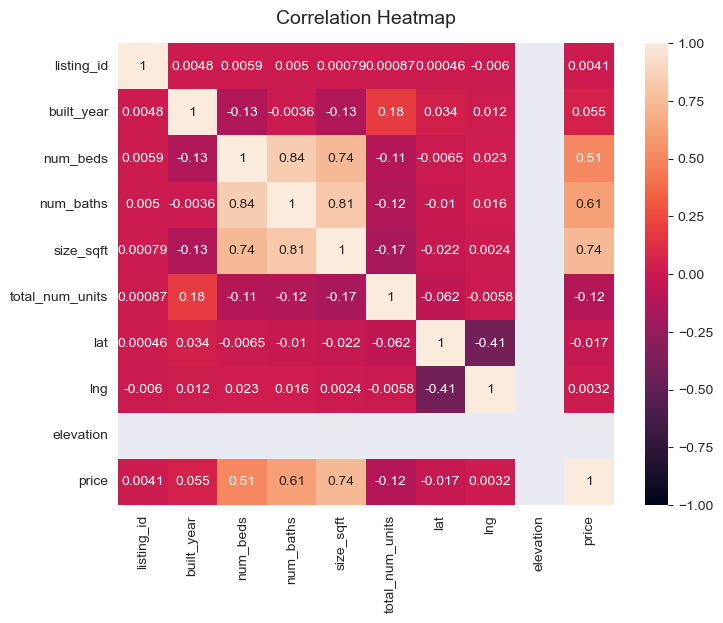

In [208]:
# Increase the size of the heatmap.
plt.figure(figsize=(8, 6))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap
ax = sns.heatmap(train_X_Y.corr(), vmin=-1, vmax=1, annot=True)
ax.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=14)
ax.tick_params(axis='x', rotation=90)

In [147]:
df_property_type_average_price = train_X_Y.groupby('property_type', as_index=False)['price'].mean().rename(columns={'price': 'average_price'})
df_property_type_counts = train_X_Y.groupby('property_type', as_index=False)['price'].count().rename(columns={'price': 'count'})

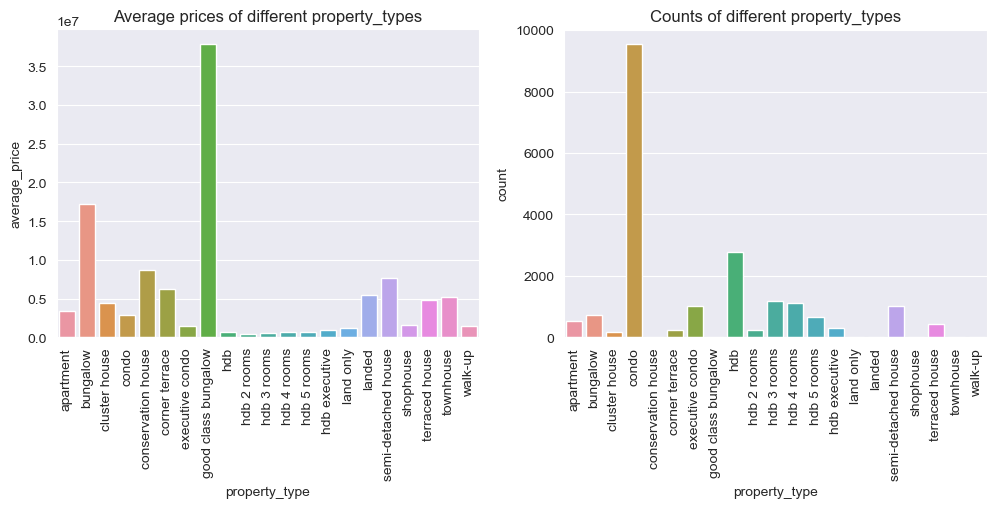

In [151]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
sns.barplot(data=df_property_type_average_price, y='average_price', x='property_type', ax=axs[0])
axs[0].tick_params(axis='x', rotation=90)
axs[0].set(title='Average prices of different property_types')
sns.barplot(data=df_property_type_counts, y='count', x='property_type', ax=axs[1])
axs[1].tick_params(axis='x', rotation=90)
axs[1].set(title='Counts of different property_types')
plt.show()

In [152]:
df_built_year_average_price = train_X_Y.groupby('built_year', as_index=False)['price'].mean().rename(columns={'price': 'average_price'})
df_built_year_counts = train_X_Y.groupby('built_year', as_index=False)['price'].count().rename(columns={'price': 'count'})

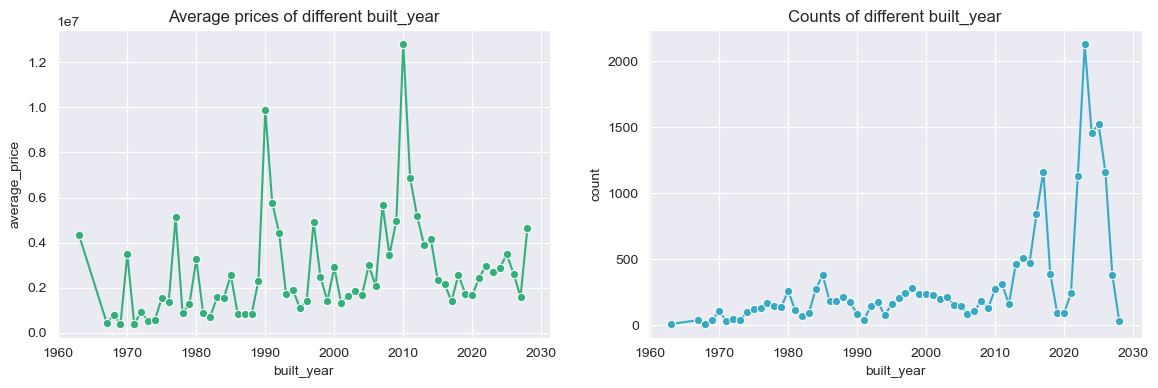

In [161]:
fig, axs = plt.subplots(ncols=2, figsize=(14,4))
sns.lineplot(data=df_built_year_average_price, x='built_year', y='average_price', ax=axs[0], marker='o', color=palette[4])
axs[0].set(title='Average prices of different built_year')
sns.lineplot(data=df_built_year_counts, x='built_year', y='count', ax=axs[1], marker='o', color=palette[6])
axs[1].set(title='Counts of different built_year')
plt.show()

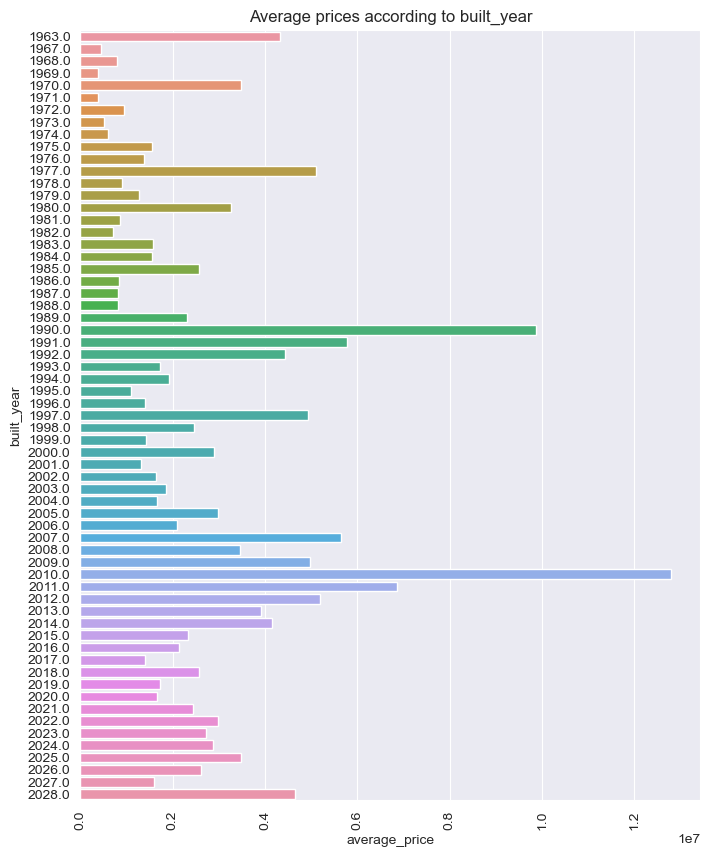

In [68]:
plt.figure(figsize=(8, 10))
ax = sns.barplot(data=df_built_year_average_price, y='built_year', x='average_price', orient='h')
ax.set(title='Average prices according to built_year', xlabel='average_price', ylabel='built_year')
ax.tick_params(axis='x', rotation=90)

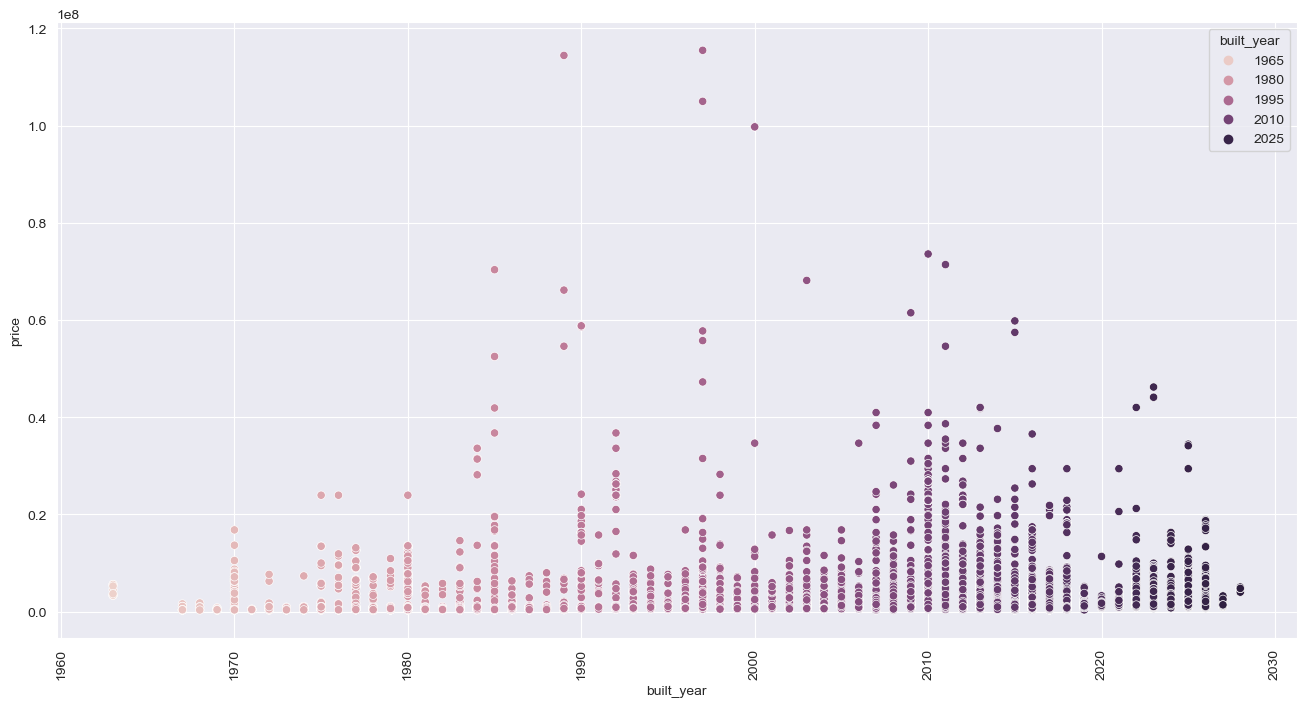

In [61]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(data=train_X_Y, x='built_year', y='price', hue='built_year')
ax.tick_params(axis='x', rotation=90)

In [100]:
df_num_beds_average_price = train_X_Y.groupby('num_beds', as_index=False)['price'].mean().rename(columns={'price': 'average_price'})
df_num_beds_counts = train_X_Y.groupby('num_beds', as_index=False)['price'].count().rename(columns={'price': 'count'})

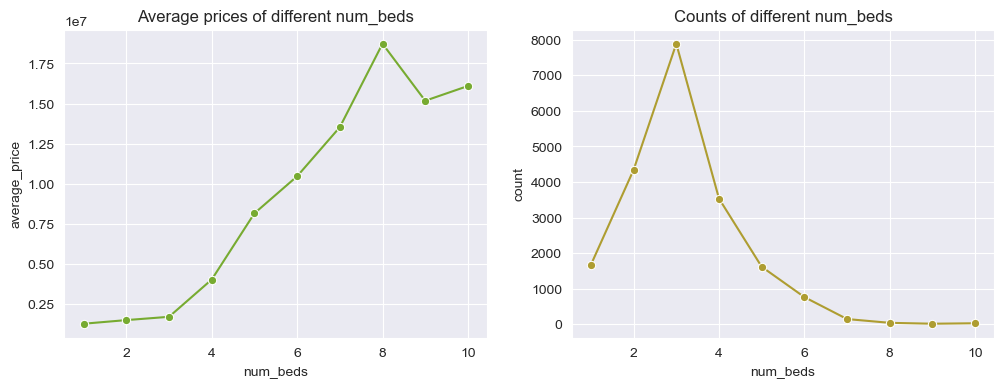

In [103]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
sns.lineplot(data=df_num_beds_average_price, x='num_beds', y='average_price', ax=axs[0], marker='o', color=palette[3])
axs[0].set(title='Average prices of different num_beds')
sns.lineplot(data=df_num_beds_counts, x='num_beds', y='count', ax=axs[1], marker='o', color=palette[2])
axs[1].set(title='Counts of different num_beds')
plt.show()

[Text(0.5, 1.0, 'Variation of Average price with num_beds'),
 Text(0.5, 0, 'num_beds'),
 Text(0, 0.5, 'average_price')]

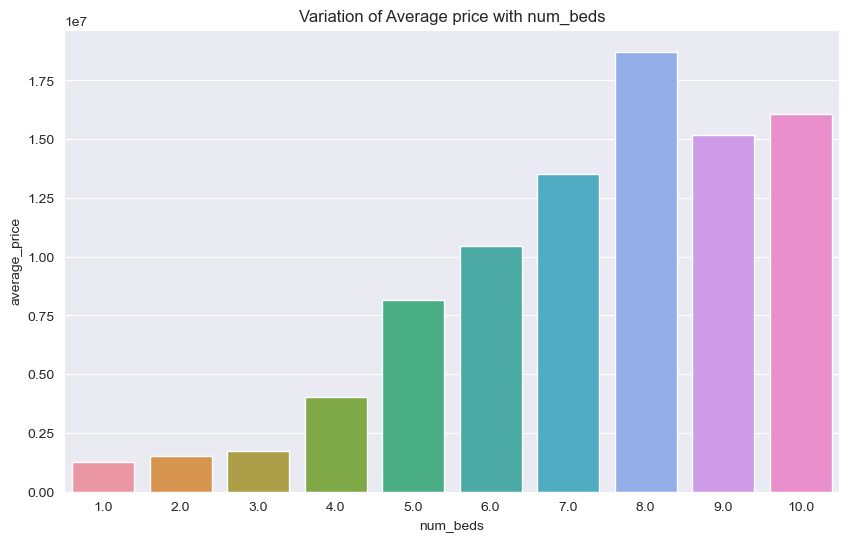

In [64]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_num_beds_average_price, x='num_beds', y='average_price')
ax.set(title='Variation of Average price with num_beds', xlabel='num_beds', ylabel='average_price')
# ax.tick_params(axis='x', rotation=90)

[Text(0.5, 1.0, 'Variation of price with num_beds'),
 Text(0.5, 0, 'num_beds'),
 Text(0, 0.5, 'price')]

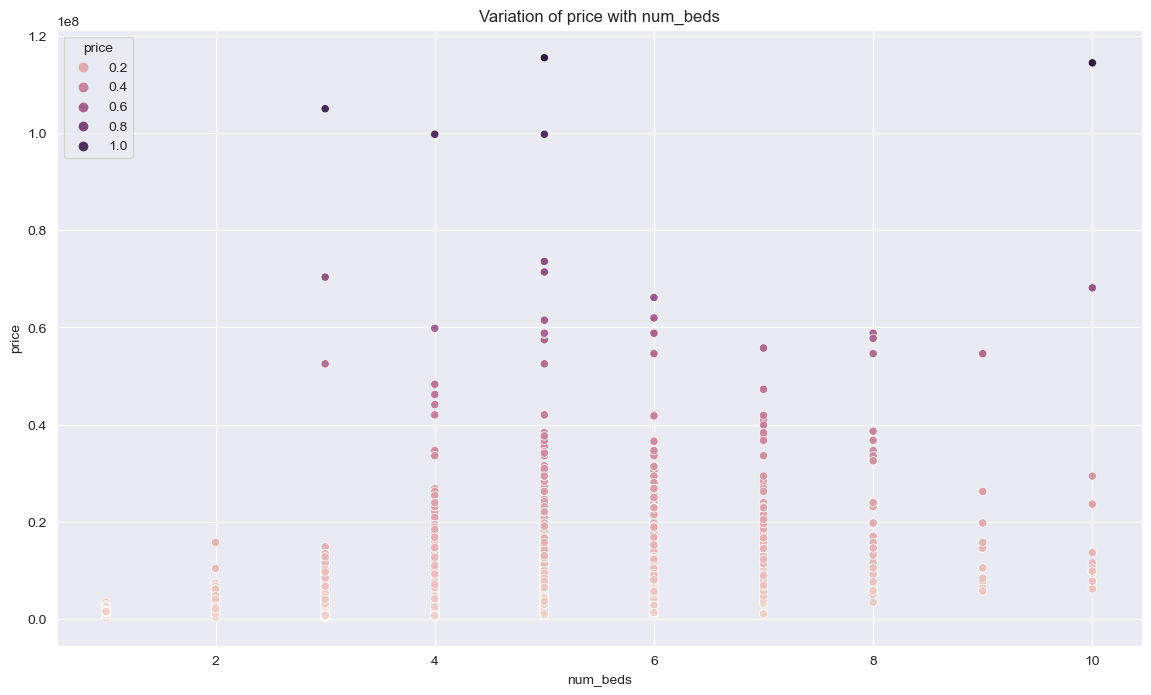

In [66]:
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(data=train_X_Y, x='num_beds', y='price', hue='price')
ax.set(title='Variation of price with num_beds', xlabel='num_beds', ylabel='price')

[Text(0.5, 1.0, 'Variation of price with num_beds'),
 Text(0.5, 0, 'price'),
 Text(0, 0.5, 'num_beds')]

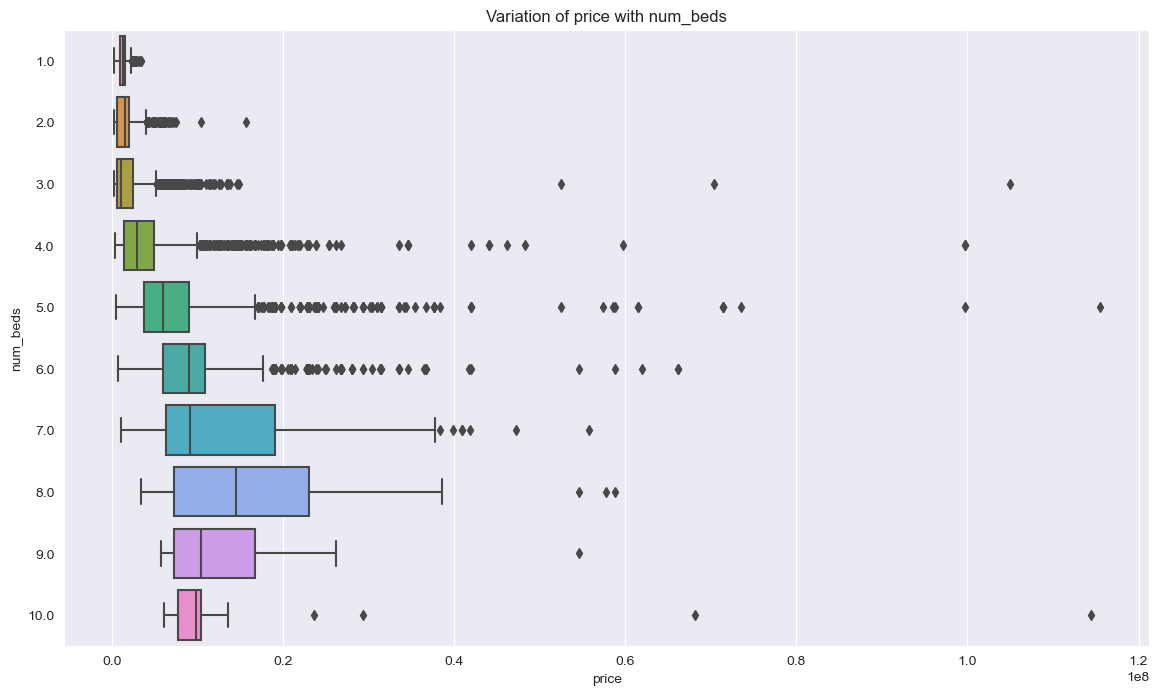

In [67]:
plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=train_X_Y, x='price', y='num_beds', orient='h')
ax.set(title='Variation of price with num_beds', xlabel='price', ylabel='num_beds')

In [104]:
df_num_baths_average_price = train_X_Y.groupby('num_baths', as_index=False)['price'].mean().rename(columns={'price': 'average_price'})
df_num_baths_counts = train_X_Y.groupby('num_baths', as_index=False)['price'].count().rename(columns={'price': 'count'})

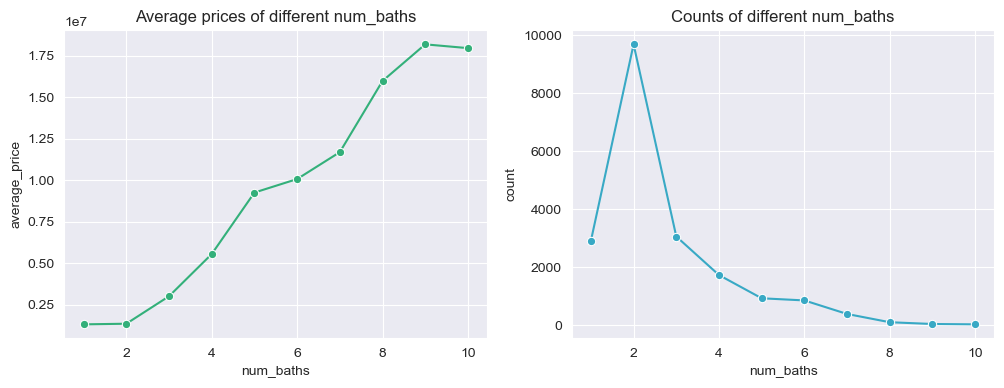

In [108]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
sns.lineplot(data=df_num_baths_average_price, x='num_baths', y='average_price', ax=axs[0], marker='o', color=palette[4])
axs[0].set(title='Average prices of different num_baths')
sns.lineplot(data=df_num_baths_counts, x='num_baths', y='count', ax=axs[1], marker='o', color=palette[6])
axs[1].set(title='Counts of different num_baths')
plt.show()

[Text(0.5, 1.0, 'Variation of Average price with num_baths'),
 Text(0.5, 0, 'num_baths'),
 Text(0, 0.5, 'average_price')]

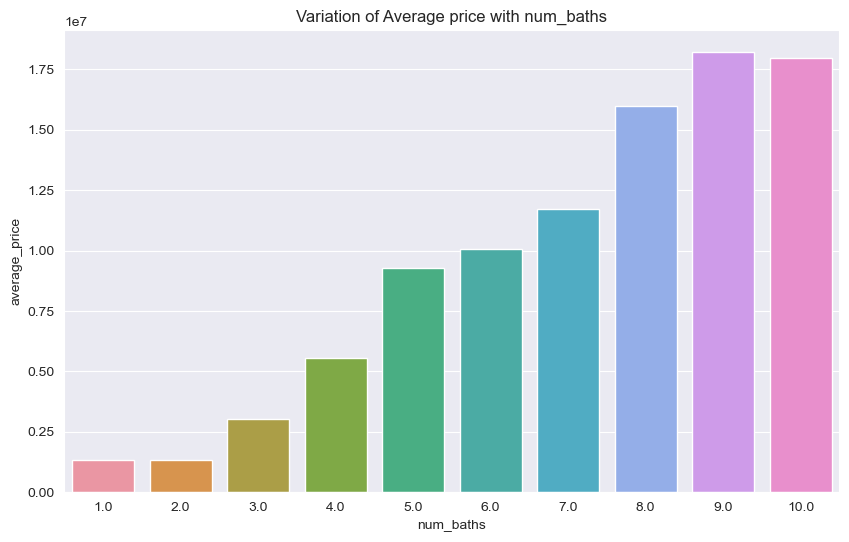

In [105]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_num_baths_average_price, x='num_baths', y='average_price')
ax.set(title='Variation of Average price with num_baths', xlabel='num_baths', ylabel='average_price')
# ax.tick_params(axis='x', rotation=90)

[Text(0.5, 1.0, 'Variation of price with num_baths'),
 Text(0.5, 0, 'num_baths'),
 Text(0, 0.5, 'price')]

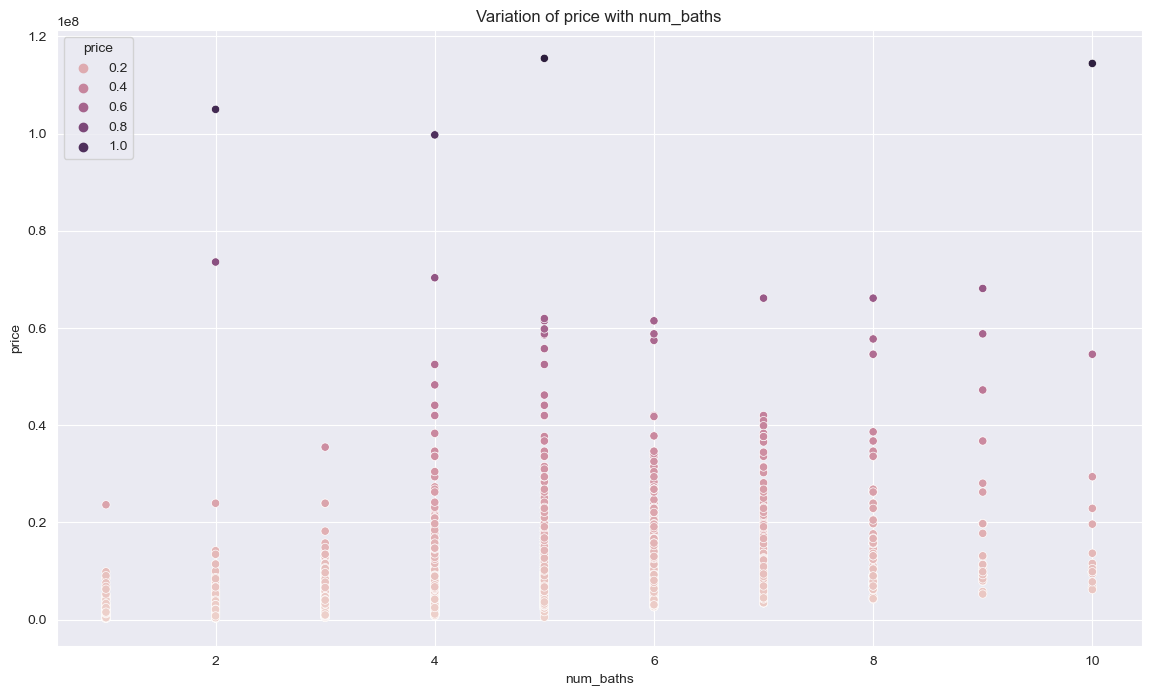

In [71]:
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(data=train_X_Y, x='num_baths', y='price', hue='price')
ax.set(title='Variation of price with num_baths', xlabel='num_baths', ylabel='price')

[Text(0.5, 1.0, 'Variation of price with num_baths'),
 Text(0.5, 0, 'price'),
 Text(0, 0.5, 'num_baths')]

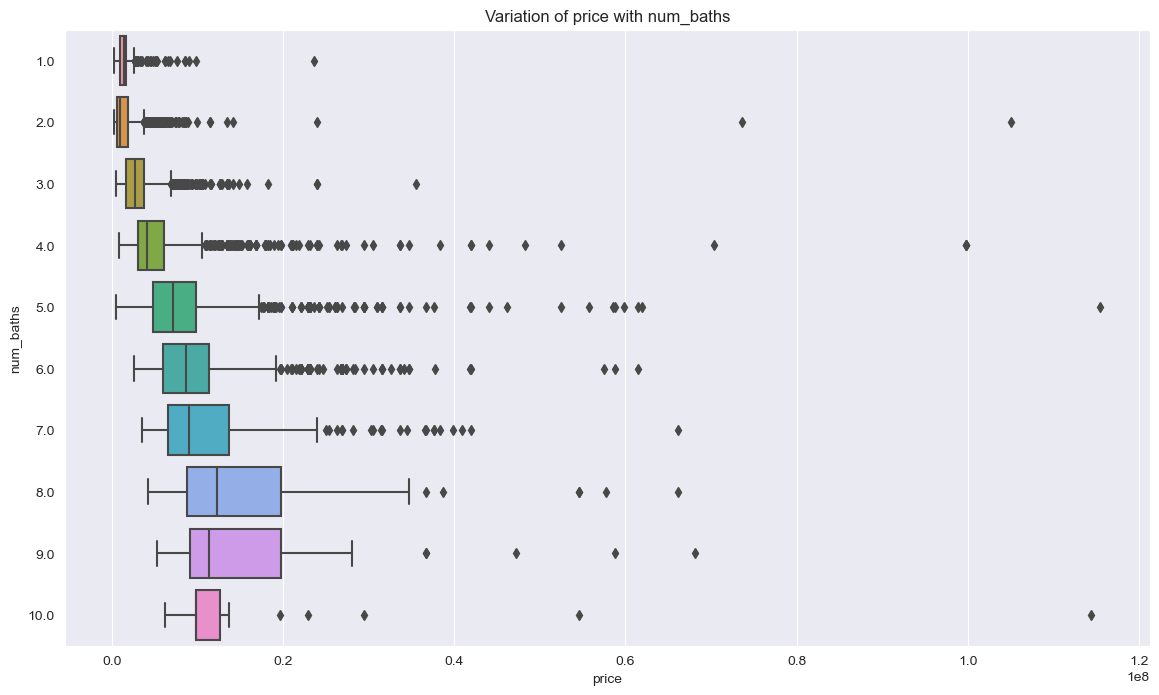

In [72]:
plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=train_X_Y, x='price', y='num_baths', orient='h')
ax.set(title='Variation of price with num_baths', xlabel='price', ylabel='num_baths')

In [171]:
def label_size_sqft(row):
    if row['size_sqft'] < 0:
        return -1
    if row['size_sqft'] > 0 and row['size_sqft'] <= 500:
        return 1
    if row['size_sqft'] > 500 and row['size_sqft'] <= 800:
        return 2
    if row['size_sqft'] > 800 and row['size_sqft'] <= 1100:
        return 3
    if row['size_sqft'] > 1100 and row['size_sqft'] <= 1500:
        return 4
    if row['size_sqft'] > 1500 and row['size_sqft'] <= 2000:
        return 5
    if row['size_sqft'] > 2000 and row['size_sqft'] <= 3000:
        return 6
    if row['size_sqft'] > 3000 and row['size_sqft'] <= 4000:
        return 7
    if row['size_sqft'] > 4000 and row['size_sqft'] <= 5000:
        return 8
    if row['size_sqft'] > 5000 and row['size_sqft'] <= 8000:
        return 9
    if row['size_sqft'] > 8000 and row['size_sqft'] <= 12000:
        return 10
    if row['size_sqft'] > 12000 and row['size_sqft'] <= 30000:
        return 11
    if row['size_sqft'] > 30000:
        return 12
    
train_X_Y['size_sqft_range'] = train_X_Y.apply(lambda row: label_size_sqft(row), axis=1)

In [172]:
train_X_Y['size_sqft_range'].value_counts()

4     5250
3     4693
2     4150
5     1695
9     1028
6      946
1      823
7      607
8      581
10     306
11      38
Name: size_sqft_range, dtype: int64

In [173]:
df_size_sqft_range_average_price = train_X_Y.groupby('size_sqft_range', as_index=False)['price'].mean().rename(columns={'price': 'average_price'})
df_size_sqft_range_counts = train_X_Y.groupby('size_sqft_range', as_index=False)['price'].count().rename(columns={'price': 'count'})

<AxesSubplot:xlabel='size_sqft', ylabel='Count'>

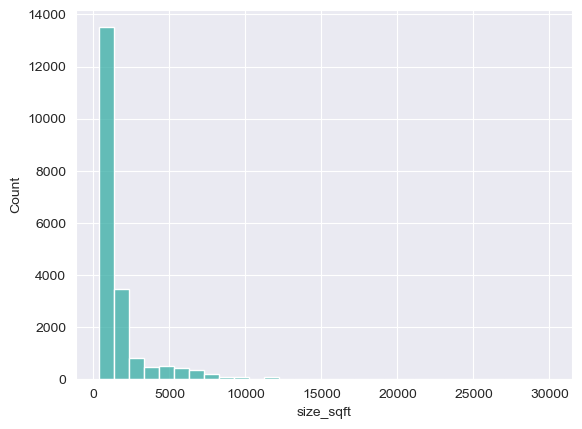

In [189]:
sns.histplot({'size_sqft': train_X_Y['size_sqft']}, x='size_sqft', bins=30, color=palette[5])

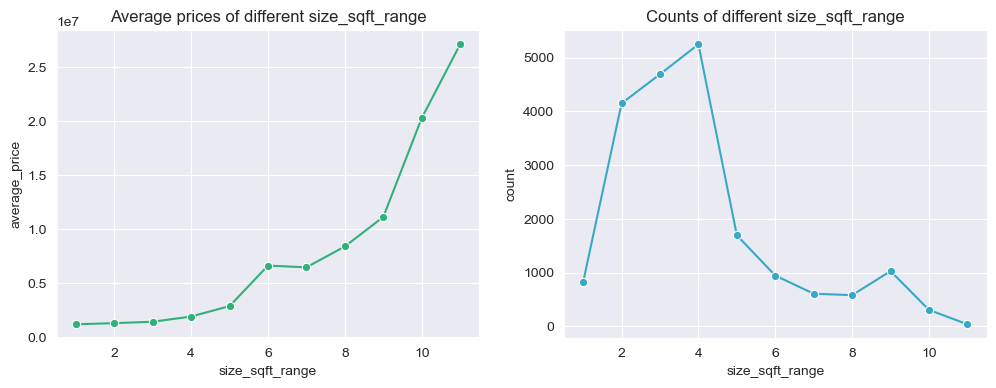

In [175]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
sns.lineplot(data=df_size_sqft_range_average_price, x='size_sqft_range', y='average_price', ax=axs[0], marker='o', color=palette[4])
axs[0].set(title='Average prices of different size_sqft_range')
sns.lineplot(data=df_size_sqft_range_counts, x='size_sqft_range', y='count', ax=axs[1], marker='o', color=palette[6])
axs[1].set(title='Counts of different size_sqft_range')
plt.show()

[Text(0.5, 1.0, 'Variation of Average price with size_sqft_range'),
 Text(0.5, 0, 'size_sqft_range'),
 Text(0, 0.5, 'average_price')]

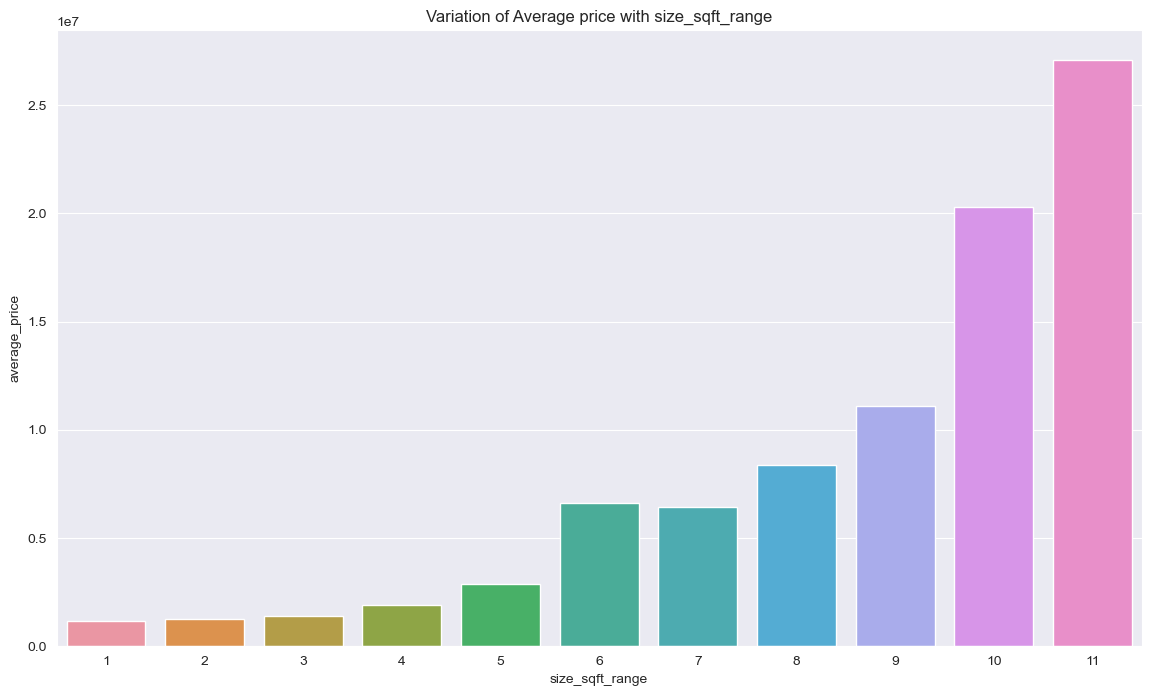

In [77]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_size_sqft_range_average_price, x='size_sqft_range', y='average_price')
ax.set(title='Variation of Average price with size_sqft_range', xlabel='size_sqft_range', ylabel='average_price')
# ax.tick_params(axis='x', rotation=90)

[Text(0.5, 1.0, 'Variation of price with size_sqft_range'),
 Text(0.5, 0, 'size_sqft_range'),
 Text(0, 0.5, 'price')]

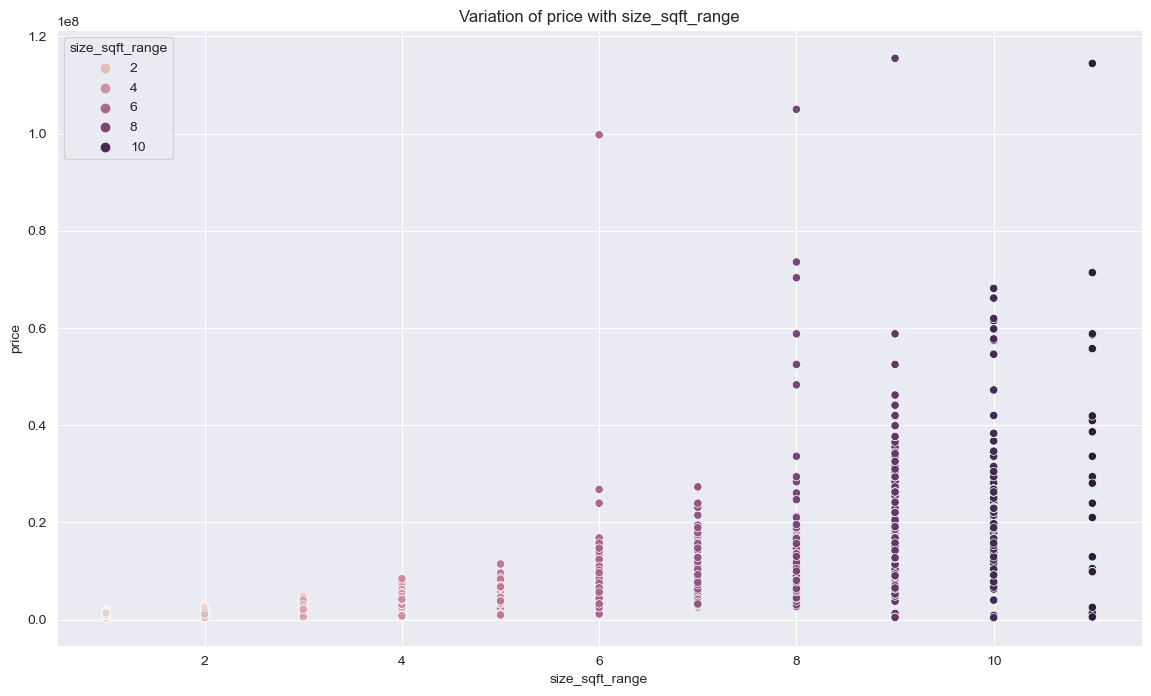

In [78]:
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(data=train_X_Y, x='size_sqft_range', y='price', hue='size_sqft_range')
ax.set(title='Variation of price with size_sqft_range', xlabel='size_sqft_range', ylabel='price')

In [117]:
df_furnishing_average_price = train_X_Y.groupby('furnishing', as_index=False)['price'].mean().rename(columns={'price': 'average_price'})
df_furnishing_counts = train_X_Y.groupby('furnishing', as_index=False)['price'].count().rename(columns={'price': 'count'})

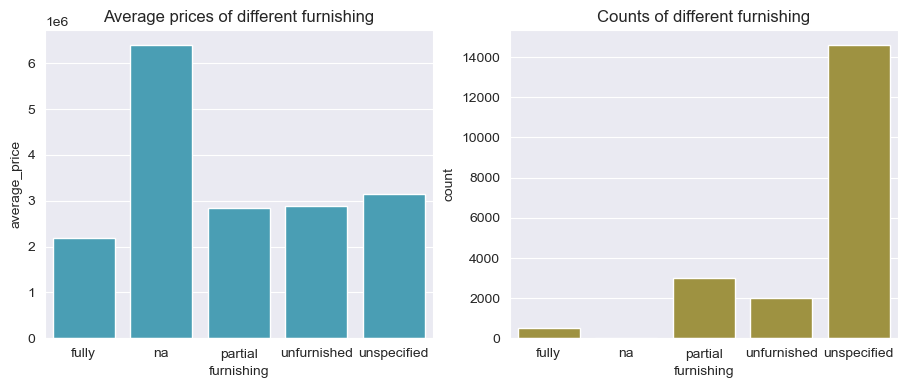

In [165]:
fig, axs = plt.subplots(ncols=2, figsize=(11,4))
sns.barplot(data=df_furnishing_average_price, x='furnishing', y='average_price', ax=axs[0], color=palette[6])
axs[0].set(title='Average prices of different furnishing')
sns.barplot(data=df_furnishing_counts, x='furnishing', y='count', ax=axs[1], color=palette[2])
axs[1].set(title='Counts of different furnishing')
plt.show()

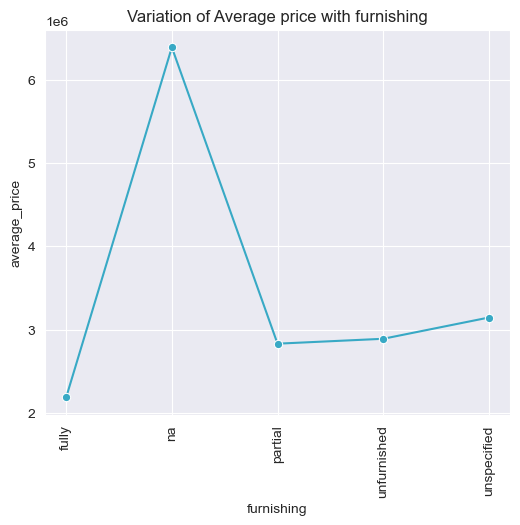

In [27]:
plt.figure(figsize=(6, 5))
ax = sns.lineplot(data=df_furnishing_average_price, x='furnishing', y='average_price', marker='o', color=palette[6])
ax.set(title='Variation of Average price with furnishing', xlabel='furnishing', ylabel='average_price')
ax.tick_params(axis='x', rotation=90)

[Text(0.5, 1.0, 'Variation of price with furnishing'),
 Text(0.5, 0, 'furnishing'),
 Text(0, 0.5, 'price')]

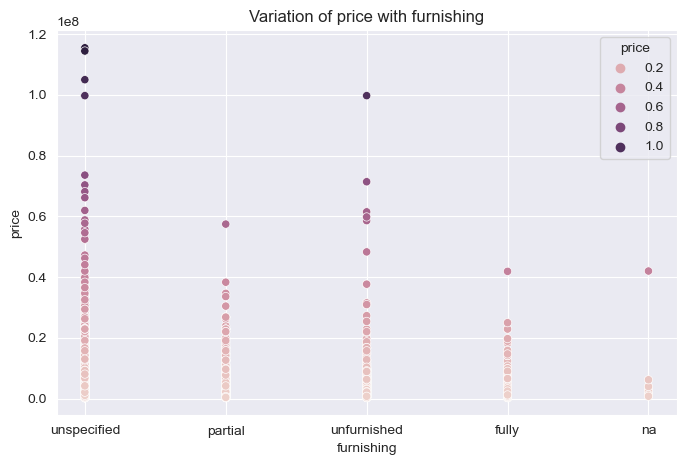

In [101]:
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(data=train_X_Y, x='furnishing', y='price', hue='price')
ax.set(title='Variation of price with furnishing', xlabel='furnishing', ylabel='price')

[Text(0.5, 1.0, 'Variation of price with furnishing'),
 Text(0.5, 0, 'price'),
 Text(0, 0.5, 'furnishing')]

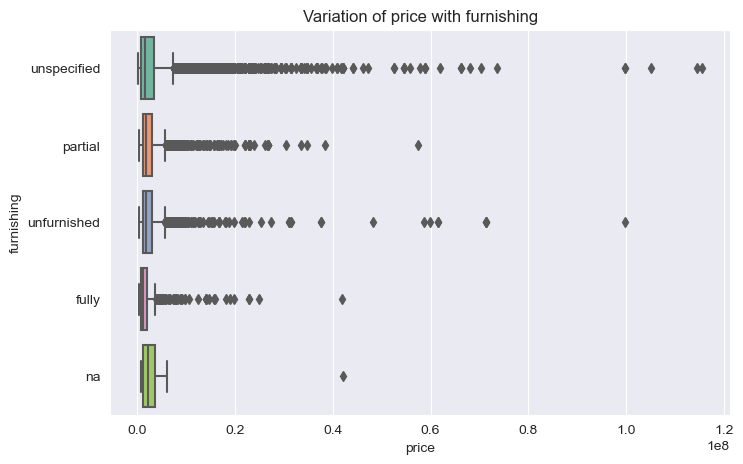

In [102]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=train_X_Y, x='price', y='furnishing', orient='h')
ax.set(title='Variation of price with furnishing', xlabel='price', ylabel='furnishing')

([<matplotlib.patches.Wedge at 0x7fa3d42252e0>,
 [Text(-0.7155905396072195, 0.8354221565320425, 'unspecified'),
  Text(0.3369437273294648, -1.0471241209204032, 'partial'),
  Text(0.9752696786894146, -0.5087721040201066, 'unfurnished'),
  Text(1.0959890377846533, -0.09385110045103426, 'fully'),
  Text(1.0999986583322936, -0.001718041662577274, 'na')],
 [Text(-0.3903221125130288, 0.4556848126538413, '73%'),
  Text(0.18378748763425354, -0.571158611411129, '15%'),
  Text(0.5319652792851352, -0.27751205673824, '10%'),
  Text(0.5978122024279926, -0.051191509336927773, '3%'),
  Text(0.5999992681812509, -0.0009371136341330585, '0%')])

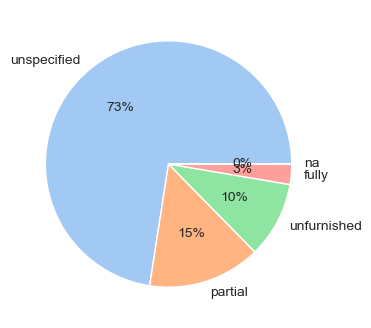

In [201]:
df = train_X_Y['furnishing'].value_counts()
plt.figure(figsize=(6, 4))
colors = sns.color_palette('pastel')[0:5]
plt.pie(df, labels=df.index, colors=colors, autopct='%.0f%%')

In [127]:
df_planning_area_average_price = train_X_Y.groupby('planning_area', as_index=False)['price'].mean().rename(columns={'price': 'average_price'})
df_planning_area_counts = train_X_Y.groupby('planning_area', as_index=False)['price'].count().rename(columns={'price': 'count'})

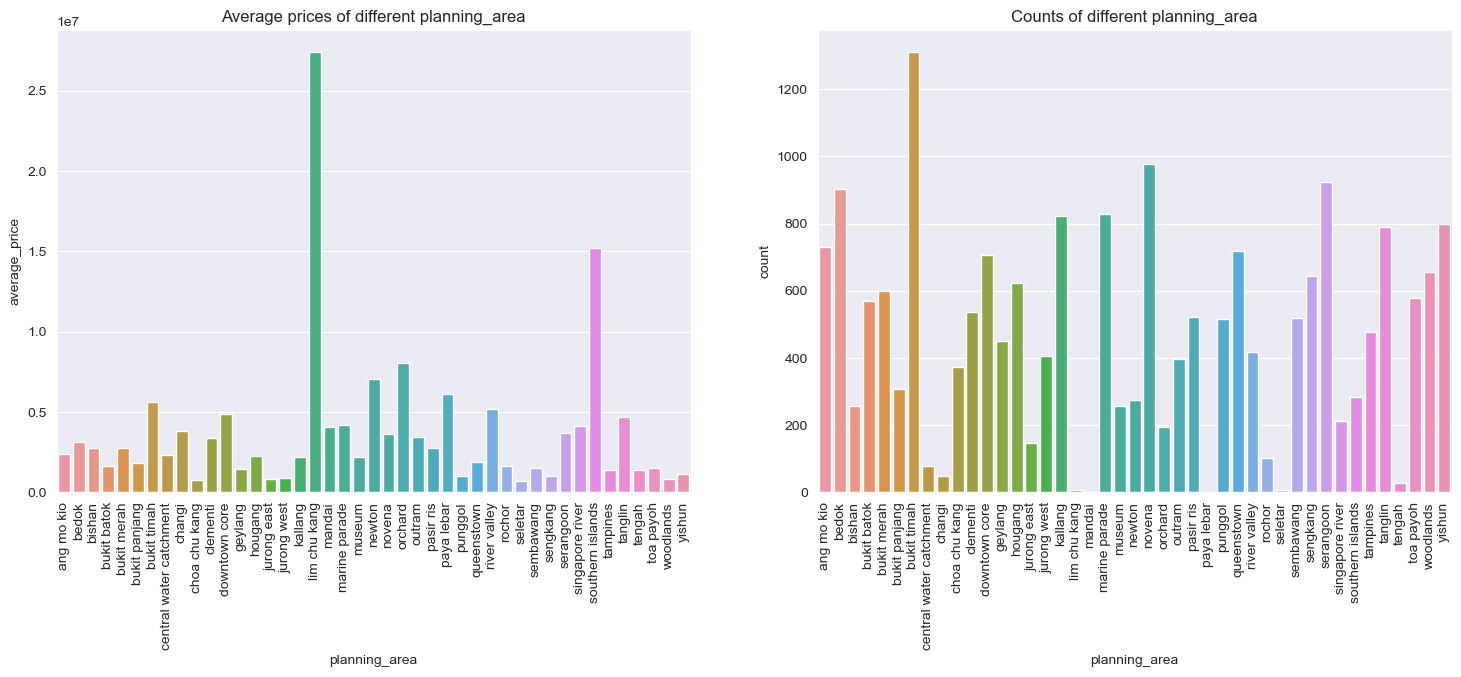

In [133]:
fig, axs = plt.subplots(ncols=2, figsize=(18,6))
sns.barplot(data=df_planning_area_average_price, x='planning_area', y='average_price', ax=axs[0])
axs[0].tick_params(axis='x', rotation=90)
axs[0].set(title='Average prices of different planning_area')
sns.barplot(data=df_planning_area_counts, x='planning_area', y='count', ax=axs[1])
axs[1].tick_params(axis='x', rotation=90)
axs[1].set(title='Counts of different planning_area')
plt.show()

[Text(0.5, 1.0, 'Variation of Average price with planning_area'),
 Text(0.5, 0, 'planning_area'),
 Text(0, 0.5, 'average_price')]

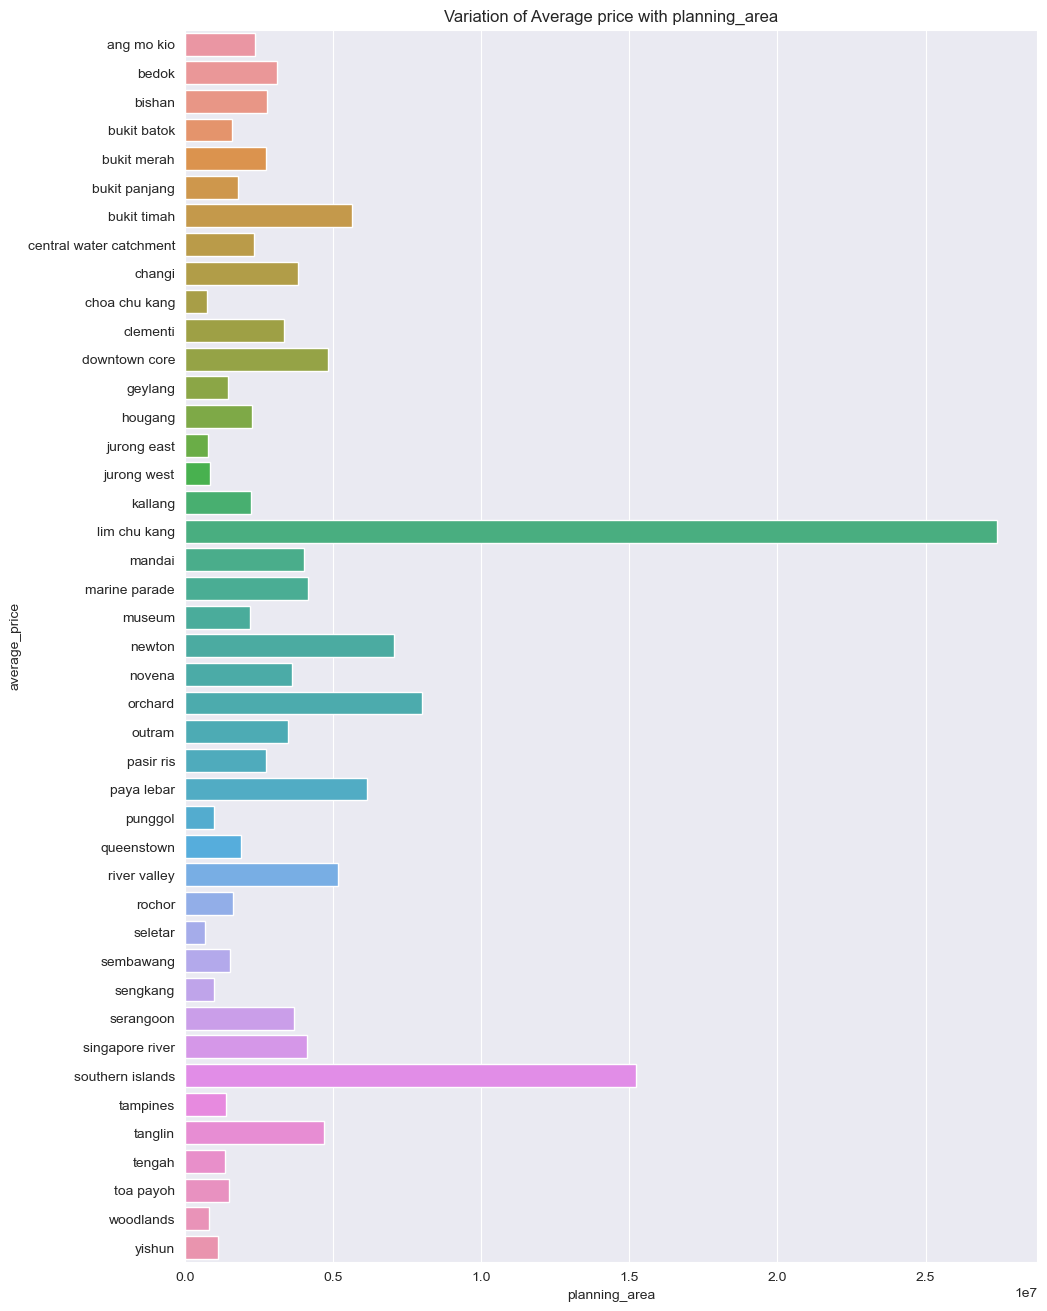

In [106]:
plt.figure(figsize=(11, 16))
ax = sns.barplot(data=df_planning_area_average_price, x='average_price', y='planning_area', orient='h')
ax.set(title='Variation of Average price with planning_area', xlabel='planning_area', ylabel='average_price')
# ax.tick_params(axis='x', rotation=90)

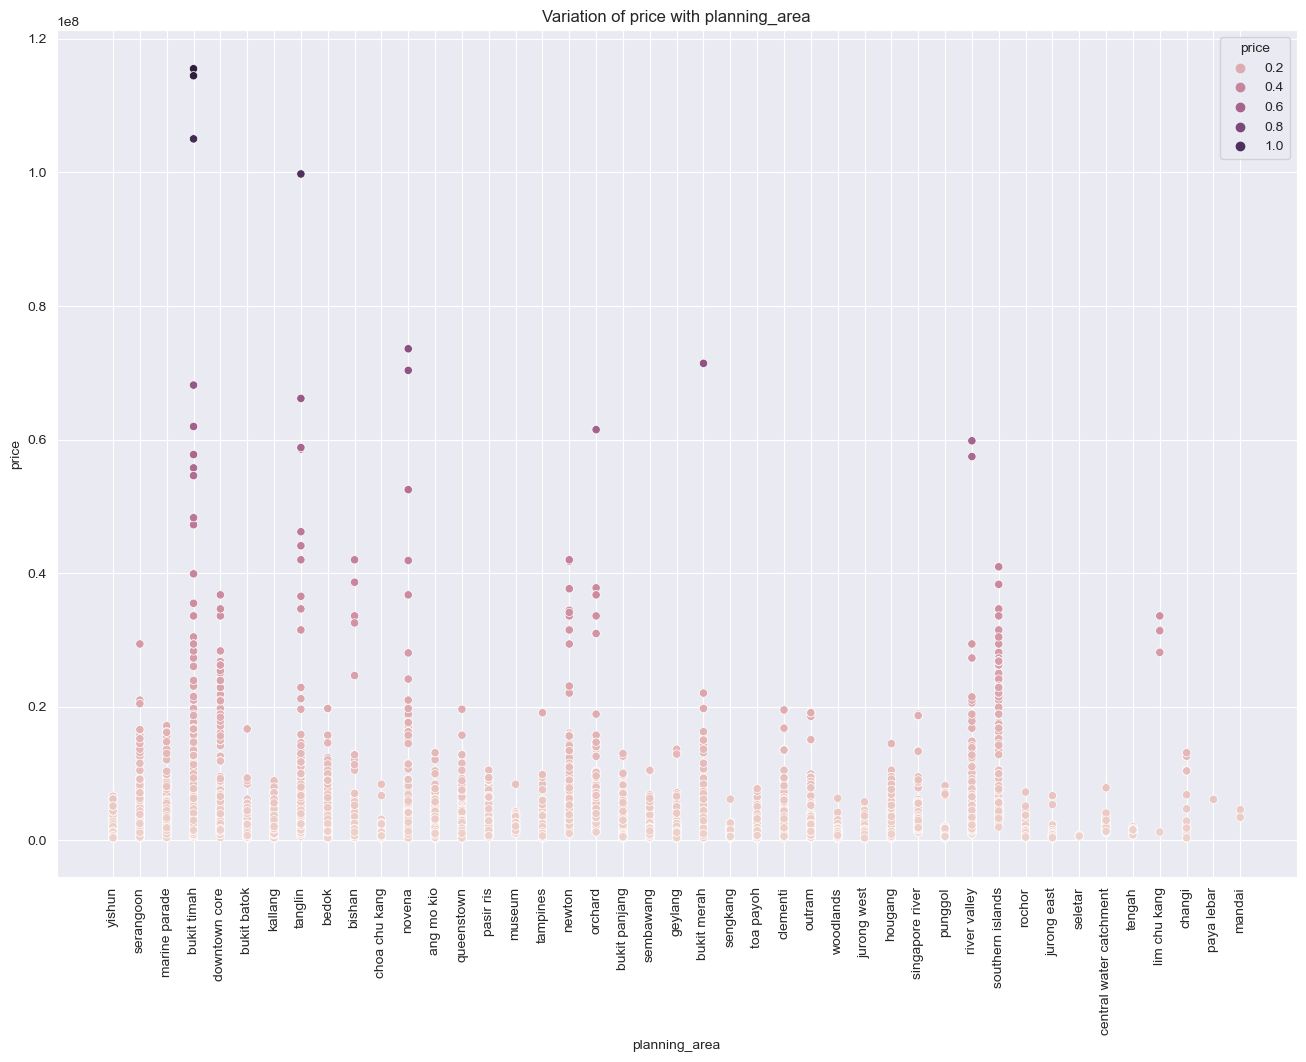

In [107]:
plt.figure(figsize=(16, 11))
ax = sns.scatterplot(data=train_X_Y, x='planning_area', y='price', hue='price')
ax.set(title='Variation of price with planning_area', xlabel='planning_area', ylabel='price')
ax.tick_params(axis='x', rotation=90)

[Text(0.5, 1.0, 'Variation of price with planning_area'),
 Text(0.5, 0, 'price'),
 Text(0, 0.5, 'planning_area')]

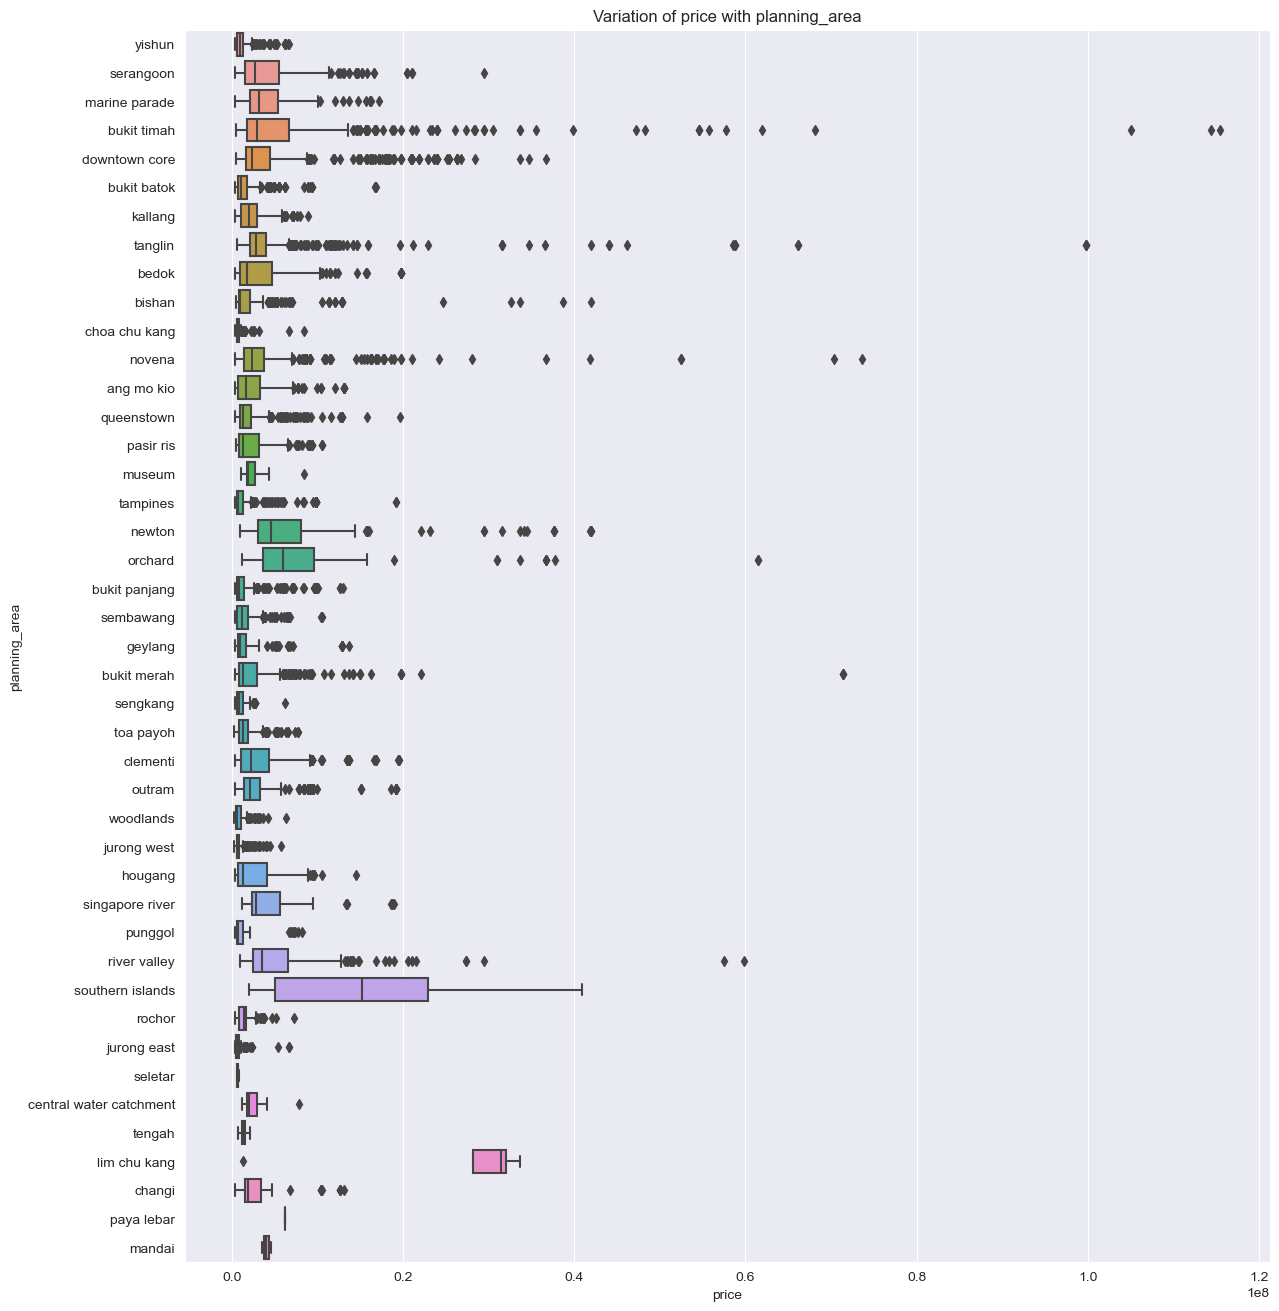

In [108]:
plt.figure(figsize=(14, 16))
ax = sns.boxplot(data=train_X_Y, x='price', y='planning_area', orient='h')
ax.set(title='Variation of price with planning_area', xlabel='price', ylabel='planning_area')

In [134]:
df_tenure_average_price = train_X_Y.groupby('tenure', as_index=False)['price'].mean().rename(columns={'price': 'average_price'})
df_tenure_counts = train_X_Y.groupby('tenure', as_index=False)['price'].count().rename(columns={'price': 'count'})

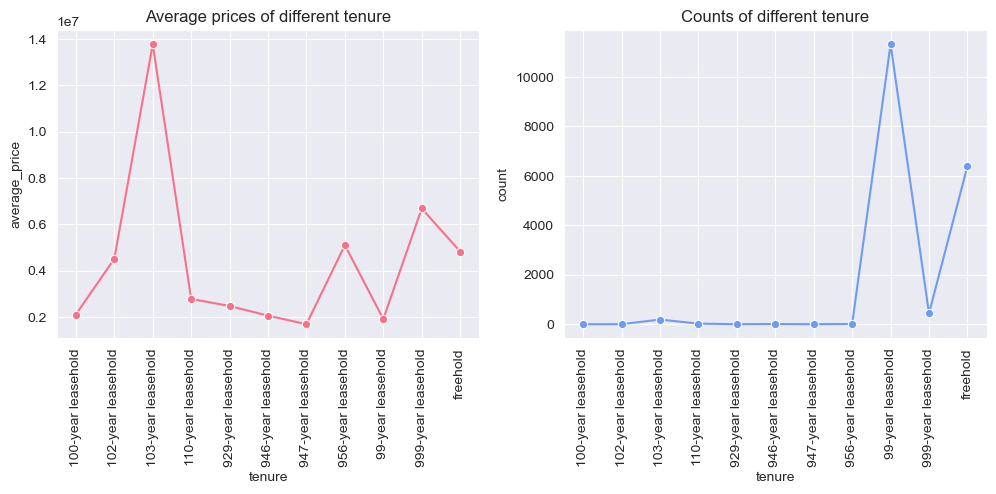

In [146]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
sns.lineplot(data=df_tenure_average_price, x='tenure', y='average_price', ax=axs[0], marker='o', color=palette[0])
axs[0].tick_params(axis='x', rotation=90)
axs[0].set(title='Average prices of different tenure')
sns.lineplot(data=df_tenure_counts, x='tenure', y='count', ax=axs[1], marker='o', color=palette[7])
axs[1].tick_params(axis='x', rotation=90)
axs[1].set(title='Counts of different tenure')
plt.show()

In [190]:
df_subzone_average_price = train_X_Y.groupby('floo_level', as_index=False)['price'].mean().rename(columns={'price': 'average_price'})
df_subzone_counts = train_X_Y.groupby('subzone', as_index=False)['price'].count().rename(columns={'price': 'count'})

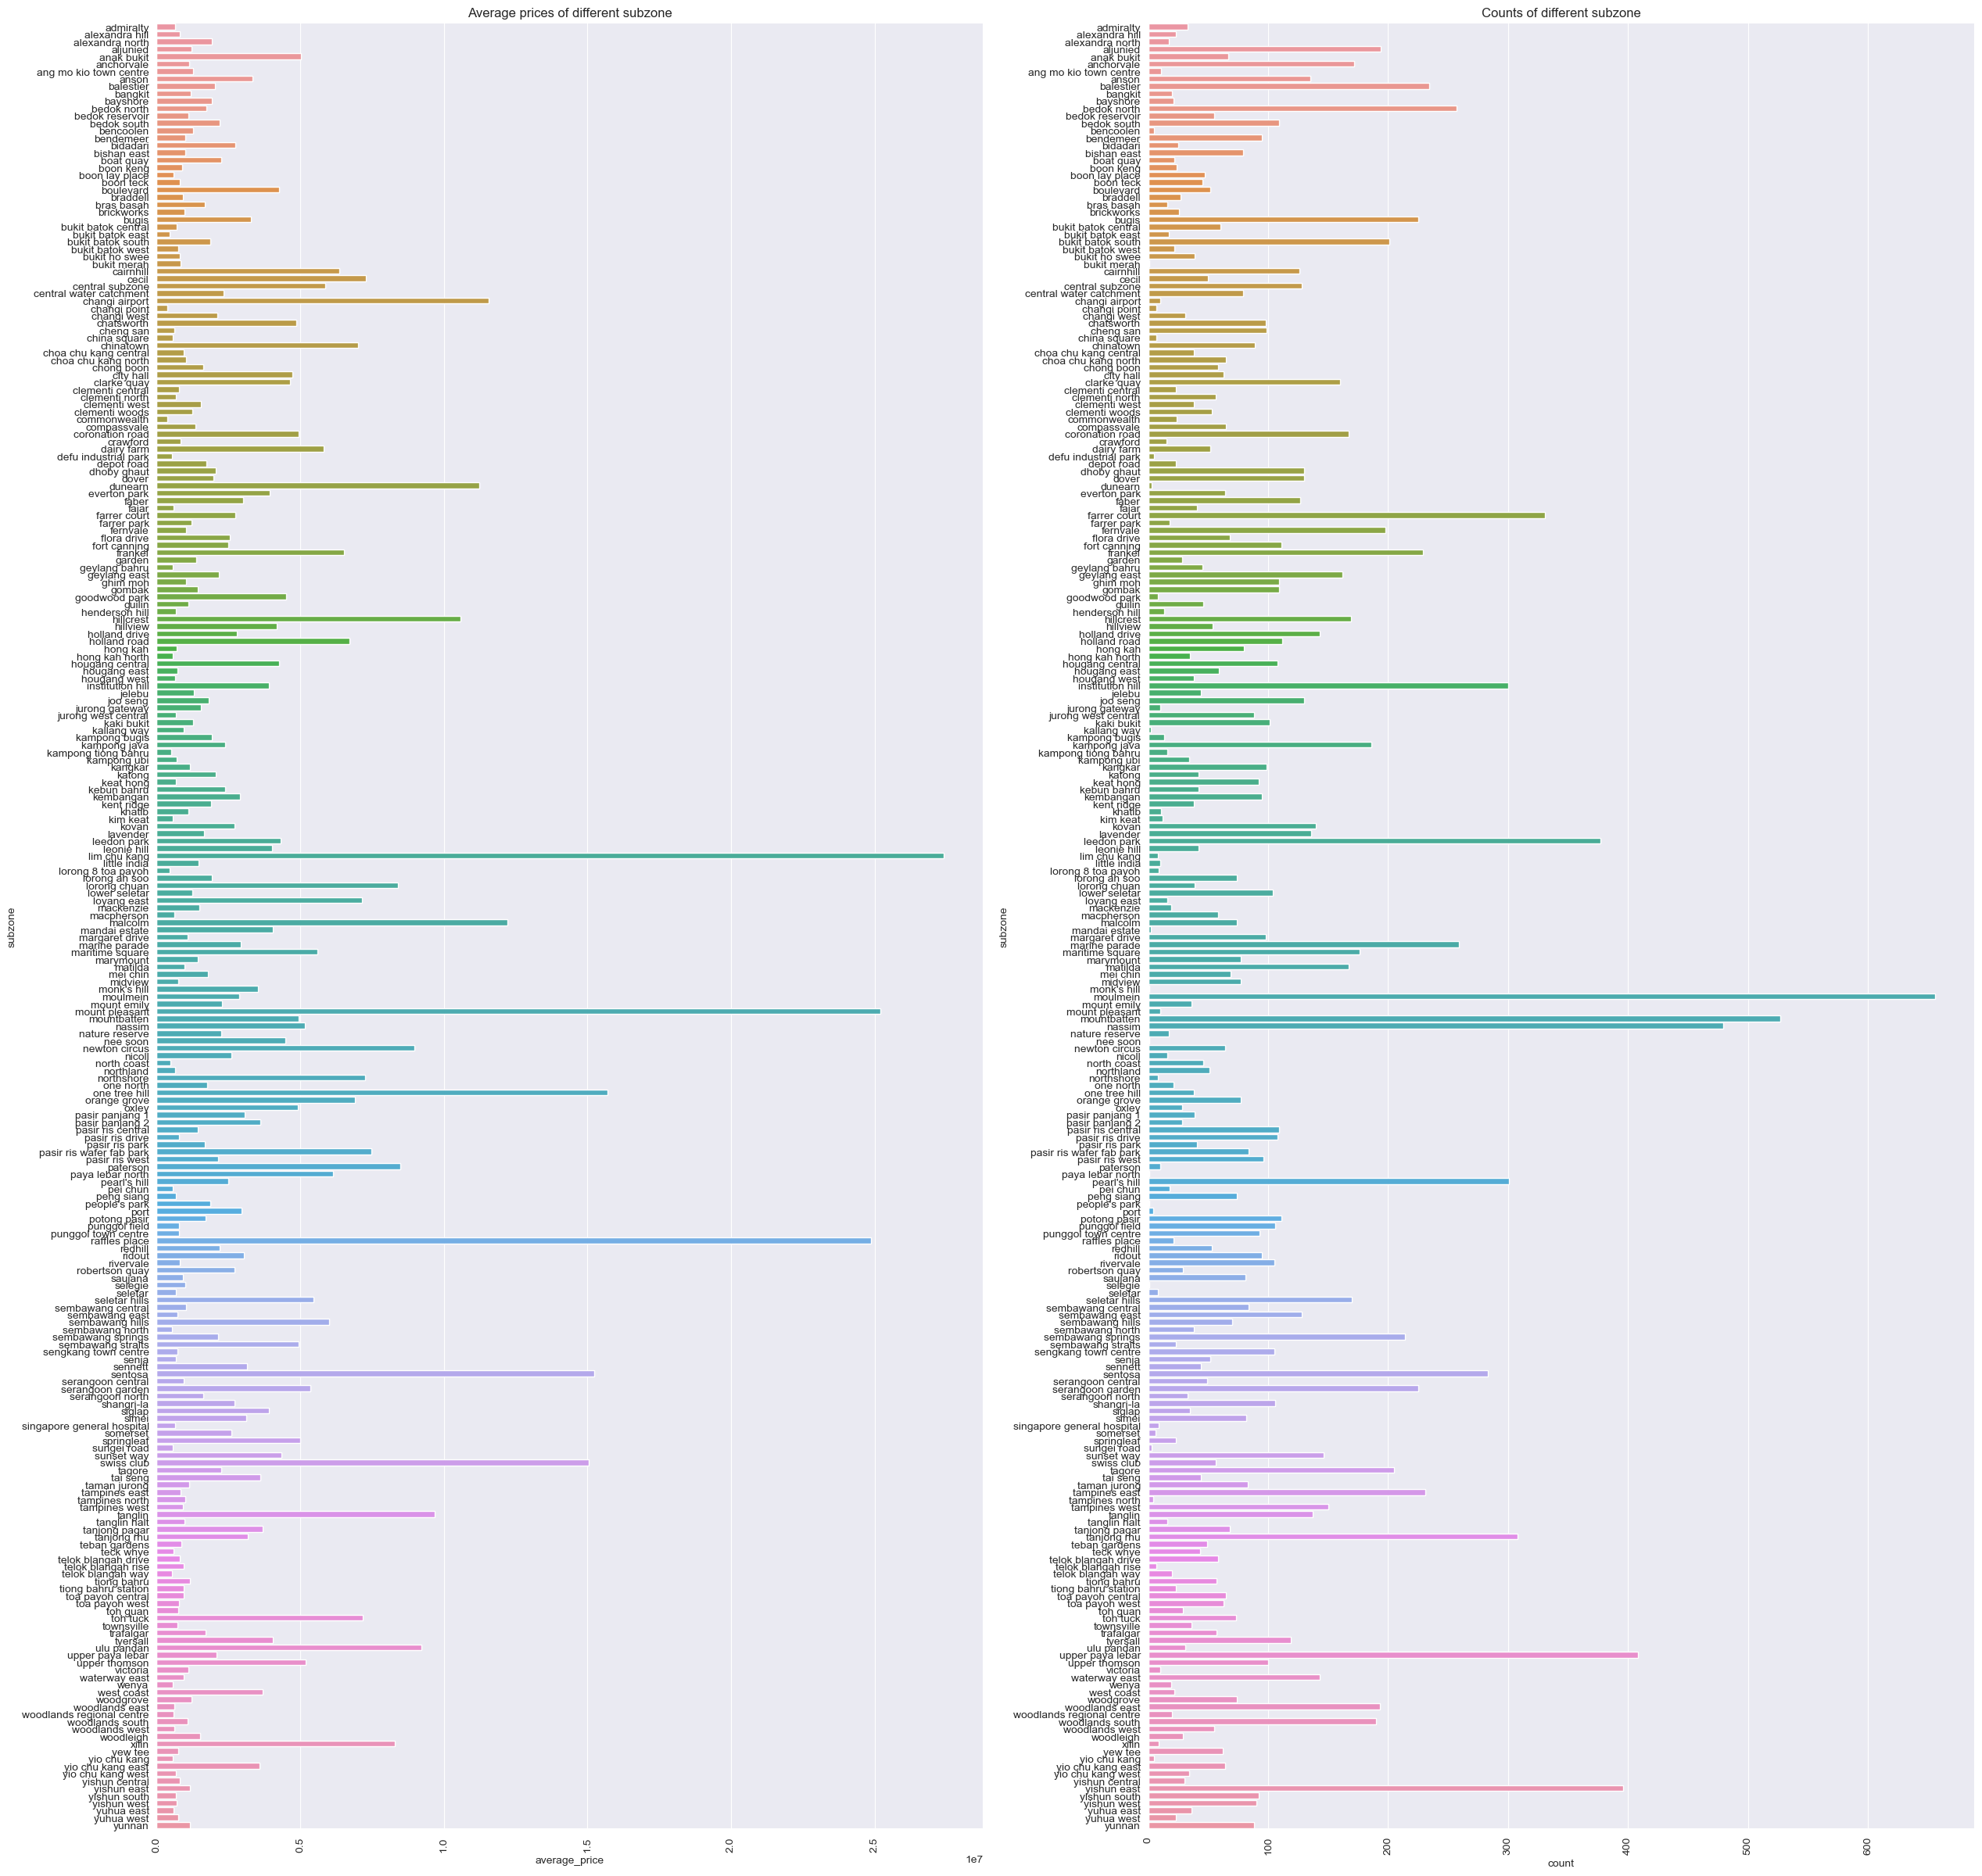

In [196]:
fig, axs = plt.subplots(ncols=2, figsize=(30,30))
sns.barplot(data=df_subzone_average_price, x='average_price', y='subzone', ax=axs[0], orient='h')
axs[0].tick_params(axis='x', rotation=90)
axs[0].set(title='Average prices of different subzone')
sns.barplot(data=df_subzone_counts, x='count', y='subzone', ax=axs[1], orient='h')
axs[1].tick_params(axis='x', rotation=90)
axs[1].set(title='Counts of different subzone')
plt.show()

([<matplotlib.patches.Wedge at 0x7fa3d417b370>,
 [Text(0.07596607924664532, 1.09737375346957, 'high'),
  Text(-0.9625069183028709, -0.5325227058249354, 'low'),
  Text(0.2264487676539739, -1.076439016214108, 'mid'),
  Text(0.9234327956986487, -0.5977222363507801, 'ground'),
  Text(1.047073673505824, -0.33710046314269454, 'top'),
  Text(1.091933909852144, -0.13296742651871613, 'penthouse'),
  Text(1.09948778403923, -0.03356505248772362, 'ground (9 total)'),
  Text(1.099700458652758, -0.025669071641062184, 'high (70 total)'),
  Text(1.0998227528914368, -0.019746195134807763, 'low (17 total)'),
  Text(1.0998865604602588, -0.015797282009947036, 'high (25 total)'),
  Text(1.099925111517834, -0.012835460742825476, 'mid (25 total)'),
  Text(1.099946381291258, -0.010860860199202434, 'low (23 total)'),
  Text(1.0999641062377439, -0.008886224653991623, 'high (23 total)'),
  Text(1.0999782863001693, -0.006911560470903422, 'high (10 total)'),
  Text(1.0999889214328356, -0.004936874013743426, 'high 

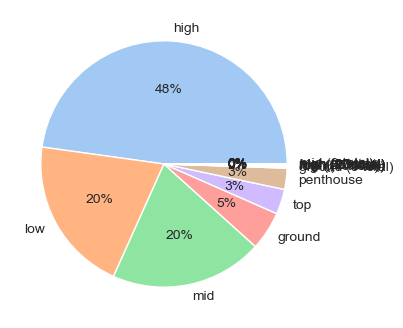

In [200]:
df = train_X_Y['floor_level'].value_counts()
plt.figure(figsize=(6, 4))
colors = sns.color_palette('pastel')[0:7]
plt.pie(df, labels=df.index, colors=colors, autopct='%.0f%%')